In [1352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In [1353]:
df_bank = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [1354]:
df_bank = pd.DataFrame(df_bank)

In [1355]:
df_bank.to_csv('df_bank.csv')

***Exploratory Analysis***

In [1356]:
df_bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1357]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [1358]:
df_bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [1359]:
df_bank.shape

(41188, 21)

In [1360]:
yes_group['age']

y
no     36548
yes     4640
Name: age, dtype: int64

<BarContainer object of 2 artists>

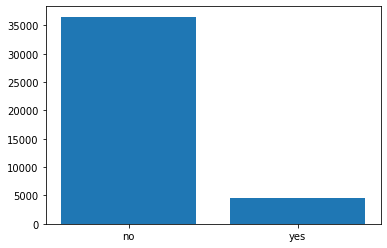

In [1361]:
yes_group = df_bank.groupby('y').count()
plt.bar(list(yes_group.index), [yes_group.iloc[0,0], yes_group.iloc[1,0]])

In [1362]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1363]:
df_bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [1364]:
df_bank.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [1365]:
df_bank.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [1366]:
df_bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Relationship Analysis

In [1367]:
correlation = df_bank.corr()

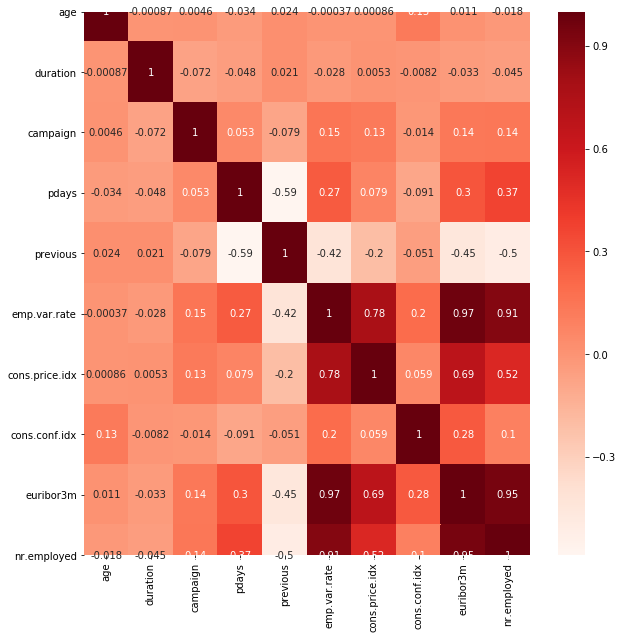

In [1368]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1369]:
#sns.pairplot(df_bank)

Yes By Month

In [1370]:
yes = df_bank[df_bank['y'] == 'yes']
yes_count = yes.groupby('month', as_index=False).count()
yes_count = yes_count[['month', 'y']]
yes_count['month'] = pd.Categorical(yes_count['month'], ['mar', 'apr', 'may', 'jun',
                                                            'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
yes_count = yes_count.sort_values('month')
yes_count.columns = ['month', 'y_count']

In [1371]:
month_count = df_bank.groupby('month', as_index=False).count()
month_count = month_count[['month', 'y']]
month_count['month'] = pd.Categorical(month_count['month'], ['mar', 'apr', 'may', 'jun',
                                                            'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
month_count = month_count.sort_values('month')

In [1372]:
join_count = pd.merge(left=month_count, right= yes_count, on='month')
join_count['perc_yes'] = join_count['y_count']/join_count['y']
join_count

,month,y,y_count,perc_yes
0,mar,546,276,0.505495
1,apr,2632,539,0.204787
2,may,13769,886,0.064347
3,jun,5318,559,0.105115
4,jul,7174,649,0.090466
5,aug,6178,655,0.106021
6,sep,570,256,0.449123
7,oct,718,315,0.438719
8,nov,4101,416,0.101439
9,dec,182,89,0.489011


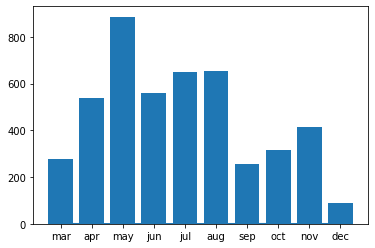

In [1373]:
plt.bar(list(join_count['month']), list(join_count['y_count']))
plt.plot(list(join_count['month']), list(join_count['perc_yes']))

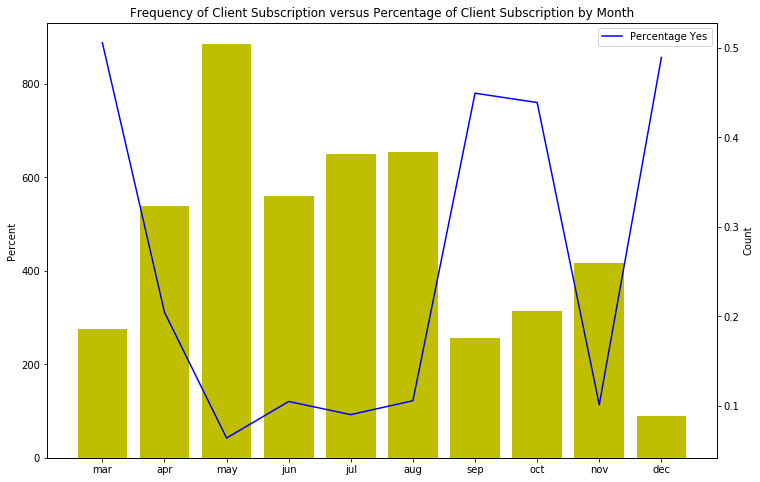

In [1374]:
plt.figure(figsize=(12,8))  
plt.bar(list(join_count['month']), list(join_count['y_count']), color='y', label='Yes Count')
plt.ylabel('Percent')      

axes2 = plt.twinx()
axes2.plot(list(join_count['month']), list(join_count['perc_yes']), color='b', label='Percentage Yes')
axes2.set_ylabel('Count')

plt.legend()
plt.title('Frequency of Client Subscription versus Percentage of Client Subscription by Month')

plt.show()

***Encode Categorical Variables***

Ordinal

In [1375]:
df_bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [1376]:
df_bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [1377]:
df_bank.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [1378]:
#encode month
encoder_month = ce.OrdinalEncoder(cols=['month'],return_df=True,
                           mapping=[{'col':'month',
'mapping':{'mar':0,'apr':1,'may':2,'jun':3,'jul':4,'aug':5, 'sep':6, 'oct':7, 'nov':8, 'dec':9}}])

#encode day
encoder_day = ce.OrdinalEncoder(cols=['day_of_week'],return_df=True,
                           mapping=[{'col':'day_of_week',
'mapping':{'mon':0,'tue':1,'wed':2,'thu':3,'fri':4}}])

In [1379]:
df_bank_encode = df_bank
df_bank_encode = encoder_month.fit_transform(df_bank_encode)
df_bank_encode = encoder_day.fit_transform(df_bank_encode)

Deal with pdays

In [1380]:
df_bank['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [1381]:
# split into 5 categories: 0-6, 7-13, 14-20, 21-27, and never contacted
## encoding transformation ##
# never contacted: 0
# 0-6: 1
# 7-13: 2
# 14-20: 3
# 21-27: 4

In [1382]:
df_bank_encode['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [1383]:
df_bank_encode.loc[(df_bank_encode.pdays >= 0) &(df_bank_encode.pdays <= 6),'pdays'] = 1
df_bank_encode.loc[(df_bank_encode.pdays >= 7) & (df_bank_encode.pdays <= 13),'pdays'] = 2
df_bank_encode.loc[(df_bank_encode.pdays >= 14) & (df_bank_encode.pdays <= 20),'pdays'] = 3
df_bank_encode.loc[(df_bank_encode.pdays >= 21) & (df_bank_encode.pdays <= 27),'pdays'] = 4
df_bank_encode.loc[(df_bank_encode.pdays == 999),'pdays'] = 0

In [1384]:
df_bank_encode['pdays'].value_counts()

0    39673
1     1117
2      316
3       74
4        8
Name: pdays, dtype: int64

Deal with Nominal Variables

In [1385]:
dtype_bank = dict(df_bank_encode.dtypes)
objectlist = []
for i in dtype_bank:
    if dtype_bank.get(i) == 'object':
        print(i + ':',dtype_bank.get(i))
        objectlist.append(i)
        df_bank_encode[i] = df_bank_encode[i].astype('category')
df_bank_encode.dtypes

job: object
marital: object
education: object
default: object
housing: object
loan: object
contact: object
poutcome: object
y: object


age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month                int64
day_of_week          int64
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [1386]:
cat_dict = {}
for i in objectlist:
    cat_dict[i] = dict(enumerate(df_bank_encode[i].cat.categories ))
    df_bank_encode[i] = df_bank_encode[i].cat.codes
cat_dict

{'job': {0: 'admin.',
  1: 'blue-collar',
  2: 'entrepreneur',
  3: 'housemaid',
  4: 'management',
  5: 'retired',
  6: 'self-employed',
  7: 'services',
  8: 'student',
  9: 'technician',
  10: 'unemployed',
  11: 'unknown'},
 'marital': {0: 'divorced', 1: 'married', 2: 'single', 3: 'unknown'},
 'education': {0: 'basic.4y',
  1: 'basic.6y',
  2: 'basic.9y',
  3: 'high.school',
  4: 'illiterate',
  5: 'professional.course',
  6: 'university.degree',
  7: 'unknown'},
 'default': {0: 'no', 1: 'unknown', 2: 'yes'},
 'housing': {0: 'no', 1: 'unknown', 2: 'yes'},
 'loan': {0: 'no', 1: 'unknown', 2: 'yes'},
 'contact': {0: 'cellular', 1: 'telephone'},
 'poutcome': {0: 'failure', 1: 'nonexistent', 2: 'success'},
 'y': {0: 'no', 1: 'yes'}}

In [1387]:
df_bank_encode

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,2,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,2,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,2,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,2,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,2,0,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,8,4,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,8,4,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,8,4,...,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,8,4,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [1388]:
df_bank_encode.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object

***Train/Test Split***

In [1389]:
y = df_bank_encode['y']
x = df_bank_encode.loc[:, df_bank_encode.columns != 'y']
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,2,0,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,2,0,149,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,2,0,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,2,0,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,2,0,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,8,4,334,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,8,4,383,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,8,4,189,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,8,4,442,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [1390]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [1391]:
print('Training Set Length:', len(x_train))
print('Training Set Percentage:', len(x_train)/len(df_bank))
print('Test Set Length:', len(x_test))
print('Test Set Percentage:', len(x_test)/len(df_bank))

Training Set Length: 30891
Training Set Percentage: 0.75
Test Set Length: 10297
Test Set Percentage: 0.25


***Drop Correlated Features***

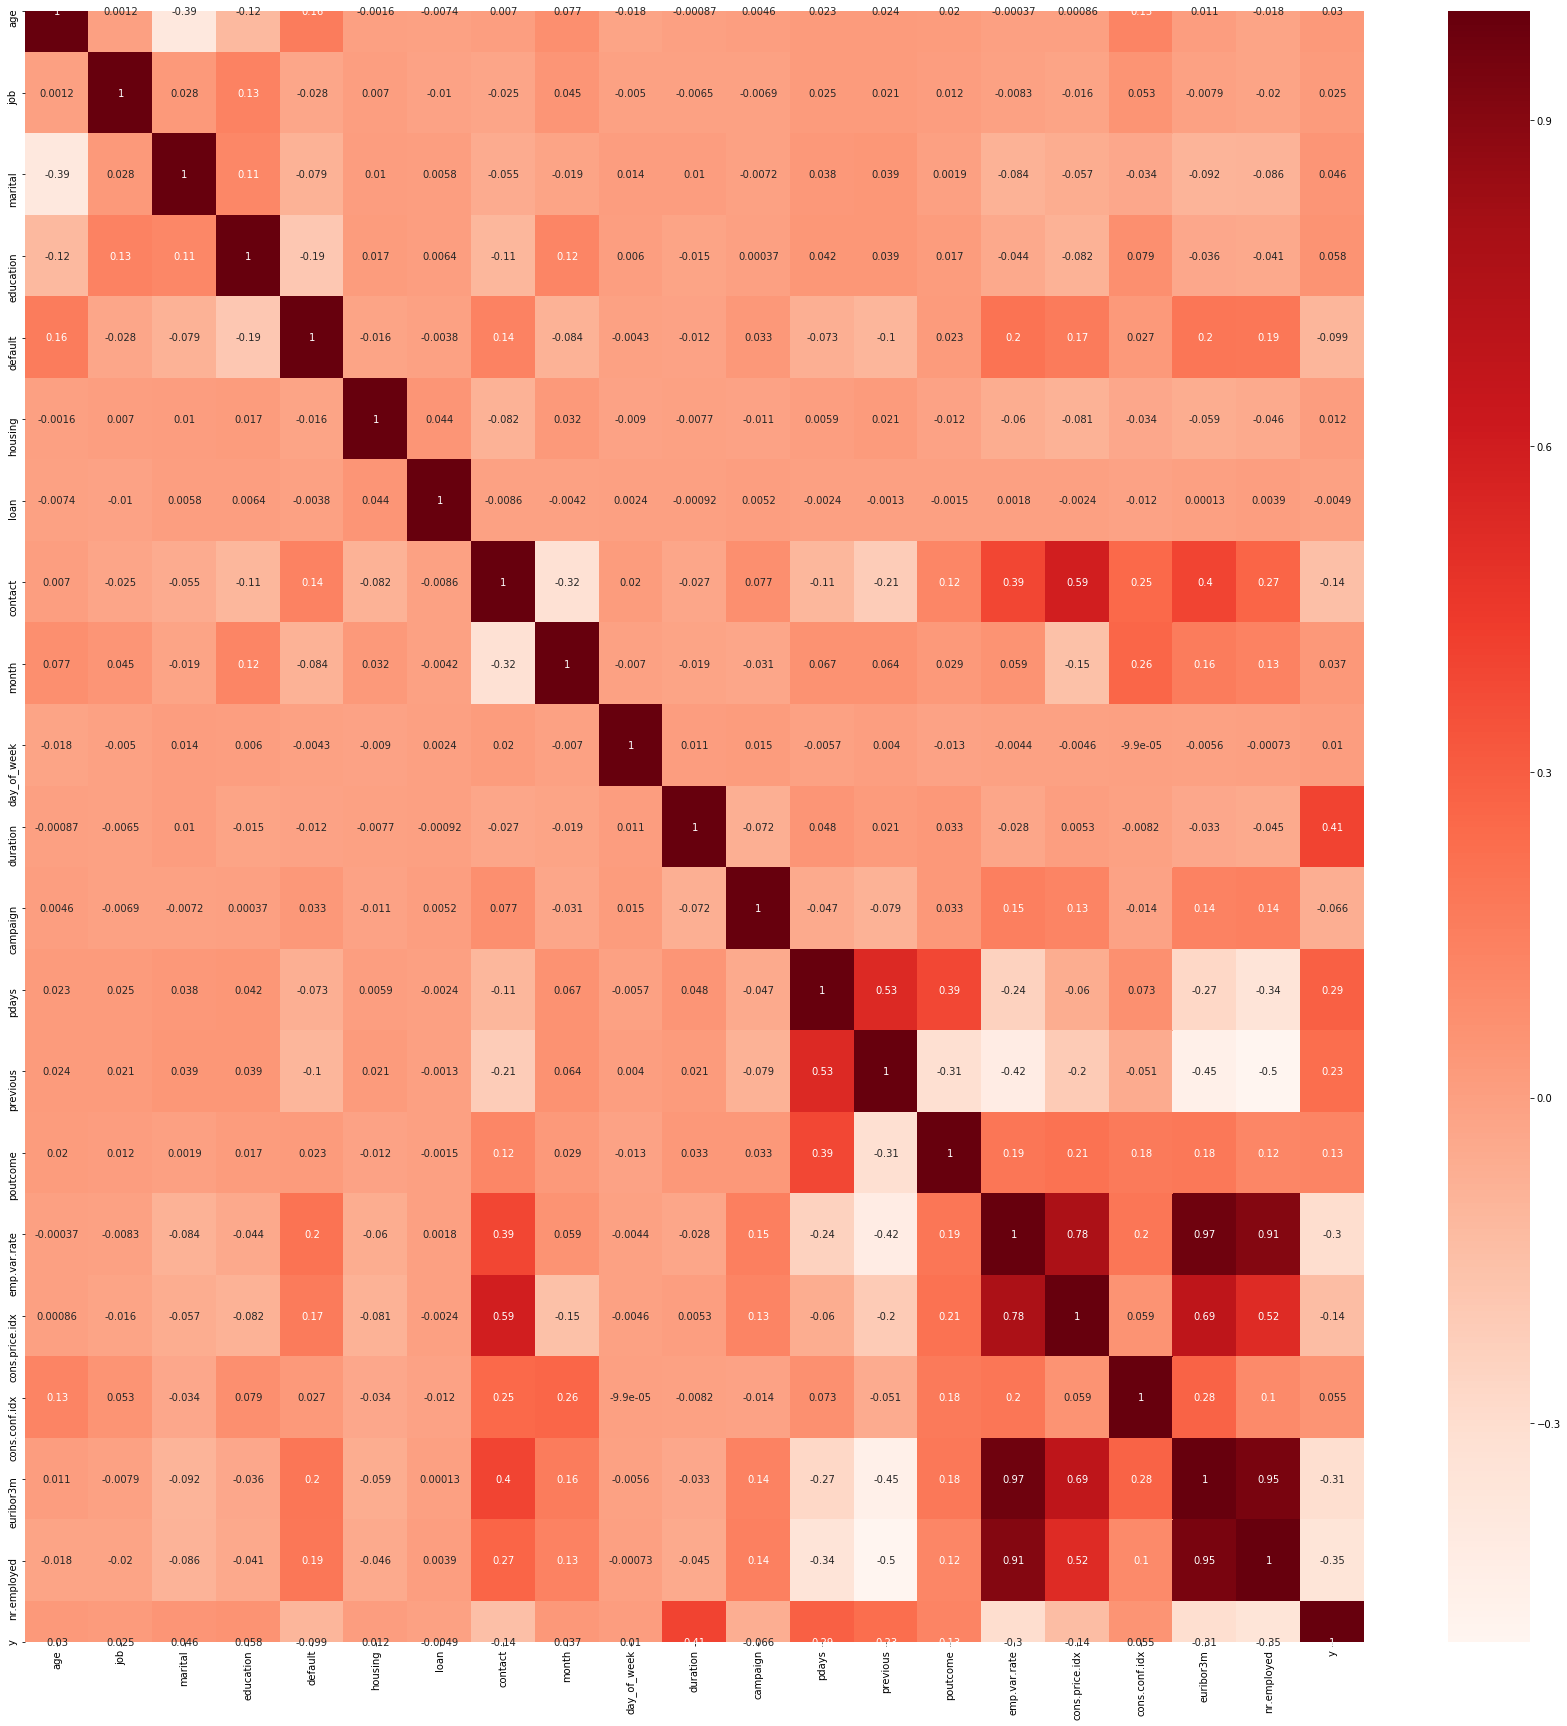

In [1392]:
correlation = df_bank_encode.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1393]:
df_bank_encode = df_bank_encode.drop('euribor3m', axis=1)
x_train = x_train.drop('euribor3m', axis=1)
x_test = x_test.drop('euribor3m', axis=1)

***Univariate Feature Selection***

In [1394]:
cat_features = objectlist[0:len(objectlist)-1]
cat_features.append('day_of_week')
cat_features.append('month')
cat_features.append('pdays')
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'day_of_week',
 'month',
 'pdays']

In [1395]:
sel = SelectKBest(chi2, k=6)
sel.fit(x_train[cat_features], y_train)
temp = sel.transform(x_train[cat_features])
support = list(sel.get_support())
sel_feat = []
for i in range(0,len(cat_features)):
    if support[i] == True:
        sel_feat.append(cat_features[i])
sel_feat

['job', 'education', 'default', 'contact', 'poutcome', 'pdays']

In [1396]:
chi_frame = chi2(x_train[cat_features], y_train)
chi2 = pd.DataFrame(chi_frame[0])
pval = pd.DataFrame(chi_frame[1])
df_cat_features = pd.DataFrame(cat_features)

In [1397]:
df_chi = pd.concat([df_cat_features, chi2, pval], axis=1)
df_chi.columns = ['Feature', 'Chi2', 'P-Val']
print(df_chi)

        Feature         Chi2         P-Val
0           job    79.163942  5.716393e-19
1       marital    23.237097  1.432080e-06
2     education    97.147764  6.434190e-23
3       default   225.191726  6.667978e-51
4       housing     1.908082  1.671764e-01
5          loan     1.525602  2.167738e-01
6       contact   410.711921  2.565428e-91
7      poutcome    69.967640  6.028536e-17
8   day_of_week     3.172878  7.487040e-02
9         month    45.660942  1.405985e-11
10        pdays  3889.007371  0.000000e+00


***Variance Threshold Feature Selection***

In [1398]:
features = x_train.columns
cont_feat = [i for i in features if i not in cat_features]
cont_feat

['age',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

In [1399]:
x_train[cont_feat].describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
count,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,40.085591,258.861481,2.561620,0.171409,0.083270,93.576241,-40.508779,5167.213952
std,10.459108,260.789550,2.766992,0.492001,1.569772,0.578914,4.618775,72.133474
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,4963.600000
25%,32.000000,103.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,5191.000000
75%,47.000000,320.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,5228.100000
max,98.000000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5228.100000


In [1400]:
var_filter = VarianceThreshold(threshold = 0.8)  
df_cont_train = x_train[cont_feat]
var_filter.fit(df_cont_train)
temp = var_filter.get_support()
cont_sel = []
for i in range(0,len(cont_feat)):
    if temp[i] == True:
        print(temp[i], ':', cont_feat[i])
        cont_sel.append(cont_feat[i])
cont_sel

True : age
True : duration
True : campaign
True : emp.var.rate
True : cons.conf.idx
True : nr.employed


['age', 'duration', 'campaign', 'emp.var.rate', 'cons.conf.idx', 'nr.employed']

In [1401]:
var_filter.get_support()

array([ True,  True,  True, False,  True, False,  True,  True])

***Update DataFrame to Include Feature Selection***

In [1402]:
display(sel_feat, cont_sel)

['job', 'education', 'default', 'contact', 'poutcome', 'pdays']

['age', 'duration', 'campaign', 'emp.var.rate', 'cons.conf.idx', 'nr.employed']

In [1403]:
final_filt_feat = sel_feat+cont_sel
print(len(final_filt_feat))

12


In [1404]:
x_train = x_train[final_filt_feat]
x_test = x_test[final_filt_feat]

In [1405]:
print(x_train.shape)
print(x_test.shape)

(30891, 12)
(10297, 12)


***Naive-Bayes Classification***

GaussianNB

In [1406]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [1407]:
print('Test Accuracy:', model.score(x_test, y_test))
print('Train Accuracy:', model.score(x_train, y_train))

Test Accuracy: 0.8829756239681461
Train Accuracy: 0.8819073516558221


In [1408]:
print(confusion_matrix(y_test, y_pred))

[[8413  725]
 [ 480  679]]


In [1409]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      9138
           1       0.48      0.59      0.53      1159

    accuracy                           0.88     10297
   macro avg       0.71      0.75      0.73     10297
weighted avg       0.89      0.88      0.89     10297



In [1410]:
predtestprobs = model.predict_proba(x_test)
predtestprobs = predtestprobs[:,1]

AUC: 0.8759825613245733


Text(0, 0.5, 'FPR')

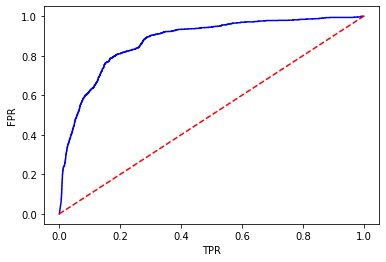

In [1411]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

***Logistic Regression***

In [1412]:
len(x_train)

30891

In [1413]:
len(x_test)

10297

Logistic Regression w/ SMOTE

In [1414]:
os = SMOTE(random_state=0)
columns = x_train.columns
os_data_x,os_data_y=os.fit_sample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [1415]:
print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  54820
Number of no subscription in oversampled data 27410
Number of subscription 27410
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [1416]:
logreg = LogisticRegression()
logreg.fit(os_data_x, os_data_y)
print('Train Accuracy:', logreg.score(x_train, y_train))
print('Test Accuracy:', logreg.score(x_test, y_test))
y_pred = logreg.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.8285584798161276
Test Accuracy: 0.8304360493347577


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1417]:
print(confusion_matrix(y_test, y_pred))

[[7566 1572]
 [ 174  985]]


In [1418]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9138
           1       0.39      0.85      0.53      1159

    accuracy                           0.83     10297
   macro avg       0.68      0.84      0.71     10297
weighted avg       0.91      0.83      0.86     10297



In [1419]:
predtestprobs = logreg.predict_proba(x_test)
predtestprobs = predtestprobs[:,1]

AUC: 0.9130046694618854


Text(0, 0.5, 'FPR')

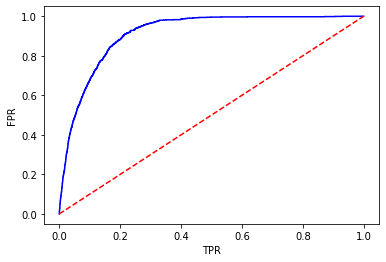

In [1420]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

Logistic Regression /wo SMOTE

In [1421]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Train Accuracy:', logreg.score(x_train, y_train))
print('Test Accuracy:', logreg.score(x_test, y_test))

Train Accuracy: 0.8989673367647535
Test Accuracy: 0.9005535592891133


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1422]:
print(confusion_matrix(y_test, y_pred))

[[8938  200]
 [ 824  335]]


In [1423]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9138
           1       0.63      0.29      0.40      1159

    accuracy                           0.90     10297
   macro avg       0.77      0.63      0.67     10297
weighted avg       0.88      0.90      0.88     10297



In [1424]:
predtestprobs = logreg.predict_proba(x_test)
predtestprobs = predtestprobs[:,1]

AUC: 0.9163520582021883


Text(0, 0.5, 'FPR')

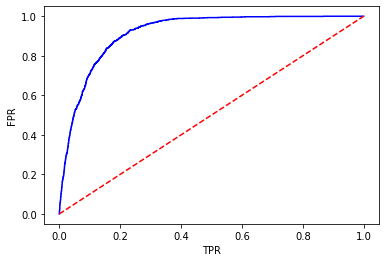

In [1425]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

L1 Penalized Logistic Regression

In [1426]:
#obtain optimal lambda
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
KFold(n_splits=5)
print(kf)
values = [10**i for i in range(-5,6)]
scores = []
for lamda in values:
    total = 0
    for train_index, test_index in kf.split(x_train):
        train_index = list(train_index)
        test_index = list(test_index)
        xtrain, xtest = x_train.iloc[train_index], x_train.iloc[test_index]
        ytrain, ytest = y_train.iloc[train_index], y_train.iloc[test_index]

        reg = LogisticRegression(penalty="l1", C=lamda, solver='liblinear', max_iter=1000).fit(xtrain, ytrain)
        score = reg.score(xtest, ytest)
        total = total + score

    score = total / 5 
    scores.append(score)
    print("K =", lamda, ": " ,score)

KFold(n_splits=5, random_state=None, shuffle=False)
K = 1e-05 :  0.8905183185290501
K = 0.0001 :  0.892331161044172
K = 0.001 :  0.8944677224431734
K = 0.01 :  0.9025606578658456
K = 0.1 :  0.9043087492693299
K = 1 :  0.9080639312836623
K = 10 :  0.9090026730855788
K = 100 :  0.9088408293612001
K = 1000 :  0.9090026888031397
K = 10000 :  0.9087760834887495
K = 100000 :  0.9089703001493536


Optimal lambda = 100

Text(0, 0.5, 'accuracy')

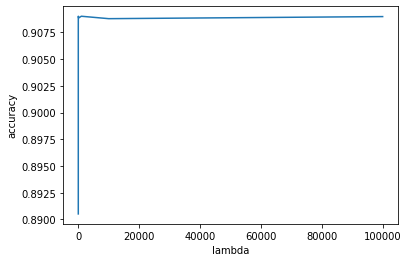

In [1427]:
plt.plot(values, scores)
plt.xlabel('lambda')
plt.ylabel('accuracy')

In [1428]:
lamda = 100

In [1429]:
logreg = LogisticRegression(penalty="l1", C=lamda, solver='liblinear', max_iter=1000).fit(x_train, y_train)

In [1430]:
y_pred = logreg.predict(x_test)
print('Train Accuracy:', logreg.score(x_train, y_train))
print('Test Accuracy:', logreg.score(x_test, y_test))

Train Accuracy: 0.9091644815642096
Test Accuracy: 0.9138584053607847


In [1431]:
print(confusion_matrix(y_test, y_pred))

[[8937  201]
 [ 686  473]]


In [1432]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9138
           1       0.70      0.41      0.52      1159

    accuracy                           0.91     10297
   macro avg       0.82      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [1433]:
predtestprobs = logreg.predict_proba(x_test)
predtestprobs = predtestprobs[:,1]

AUC: 0.9289199676478258


Text(0, 0.5, 'FPR')

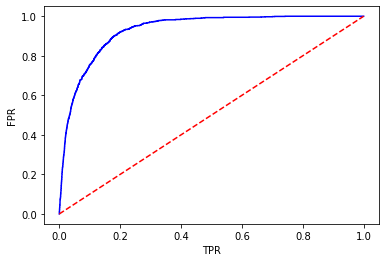

In [1434]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

L2 Penalized Logistic Regression

In [1435]:
#obtain optimal lambda
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
KFold(n_splits=5)
print(kf)
values = [10**i for i in range(-5,6)]
scores = []
for lamda in values:
    total = 0
    for train_index, test_index in kf.split(x_train):
        train_index = list(train_index)
        test_index = list(test_index)
        xtrain, xtest = x_train.iloc[train_index], x_train.iloc[test_index]
        ytrain, ytest = y_train.iloc[train_index], y_train.iloc[test_index]

        reg = LogisticRegression(penalty="l2", C=lamda, max_iter=10000).fit(xtrain, ytrain)
        score = reg.score(xtest, ytest)
        total = total + score

    score = total / 5 
    scores.append(score)
    print("K =", lamda, ": " ,score)

KFold(n_splits=5, random_state=None, shuffle=False)
K = 1e-05 :  0.8928490494359729
K = 0.0001 :  0.8938849781559959
K = 0.001 :  0.8980285725347883
K = 0.01 :  0.9031433340435925
K = 0.1 :  0.903823160465137
K = 1 :  0.904017387604115
K = 10 :  0.9044382357750441
K = 100 :  0.9040497710187143
K = 1000 :  0.9039526626884122
K = 10000 :  0.9039850094287027
K = 100000 :  0.9040497657795274


Optimal lamda = 1000

In [1436]:
lamda = 1000

In [1437]:
logreg = LogisticRegression(penalty="l2", C=lamda, solver='liblinear', max_iter=10000).fit(x_train, y_train)

In [1438]:
y_pred = logreg.predict(x_test)
print('Train Accuracy:', logreg.score(x_train, y_train))
print('Test Accuracy:', logreg.score(x_test, y_test))

Train Accuracy: 0.904243954549869
Test Accuracy: 0.9069631931630572


In [1439]:
print(confusion_matrix(y_test, y_pred))

[[8916  222]
 [ 736  423]]


In [1440]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9138
           1       0.66      0.36      0.47      1159

    accuracy                           0.91     10297
   macro avg       0.79      0.67      0.71     10297
weighted avg       0.89      0.91      0.89     10297



In [1441]:
predtestprobs = logreg.predict_proba(x_test)
predtestprobs = predtestprobs[:,1]

AUC: 0.9250551556226065


Text(0, 0.5, 'FPR')

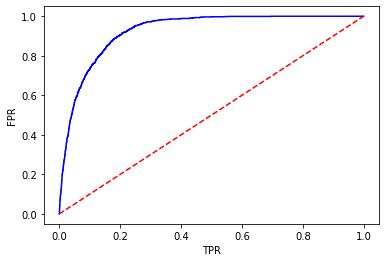

In [1442]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

***Decision Tree***

In [1443]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Test Accuracy: 0.8876371758764688
Train Accuracy: 0.9999352562234955


We notice that the algorithm overfits the training data

In [1444]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)
columns = list(x_train.columns)
rank_val = rfe.ranking_
rankings = {}
for i in range(0,12):
    rankings[columns[i]] = rank_val[i]
selected_features = []
for i in rankings:
    if rankings[i] == 1:
        selected_features.append(i)
selected_features

['job',
 'education',
 'poutcome',
 'pdays',
 'age',
 'duration',
 'campaign',
 'emp.var.rate',
 'cons.conf.idx',
 'nr.employed']

In [1445]:
x_train_filt = x_train[selected_features]
x_test_filt = x_test[selected_features]

In [1446]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train_filt,y_train)
y_pred_test = clf.predict(x_test_filt)
y_pred_train = clf.predict(x_train_filt)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Test Accuracy: 0.8841410119452268
Train Accuracy: 0.9999352562234955


[Text(355.2616761503988, 401.70441176470587, 'X[9] <= 5087.65\ngini = 0.2\nsamples = 30891\nvalue = [27410, 3481]'),
 Text(137.7852362678188, 389.7132352941176, 'X[5] <= 172.5\ngini = 0.494\nsamples = 3705\nvalue = [2056, 1649]'),
 Text(48.63114629549617, 377.7220588235294, 'X[5] <= 133.5\ngini = 0.277\nsamples = 1400\nvalue = [1167, 233]'),
 Text(28.1476388584363, 365.7308823529412, 'X[2] <= 1.5\ngini = 0.18\nsamples = 950\nvalue = [855, 95]'),
 Text(12.811954271674363, 353.73970588235295, 'X[5] <= 77.5\ngini = 0.144\nsamples = 832\nvalue = [767, 65]'),
 Text(1.7272422421131375, 341.7485294117647, 'X[7] <= -3.2\ngini = 0.014\nsamples = 285\nvalue = [283, 2]'),
 Text(1.38179379369051, 329.75735294117646, 'X[4] <= 29.5\ngini = 0.075\nsamples = 51\nvalue = [49, 2]'),
 Text(0.690896896845255, 317.7661764705882, 'X[1] <= 4.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3454484484226275, 305.775, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(1.0363453452678826, 305.775, 'X[5] <

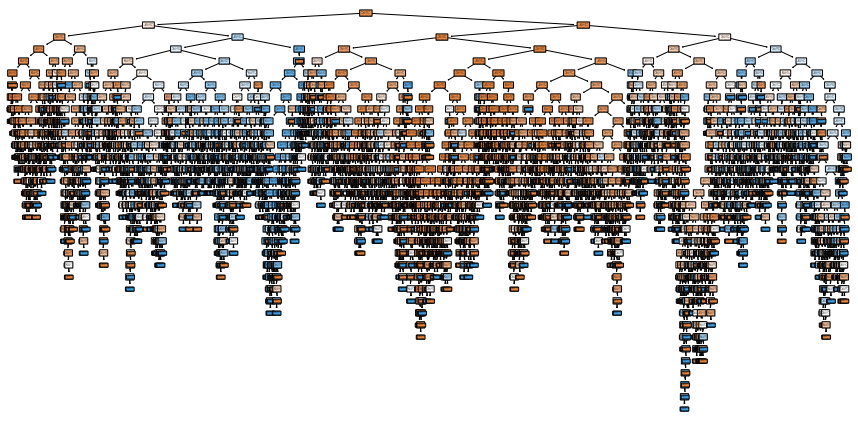

In [1447]:
plt.figure(figsize=(15, 7.5))
tree.plot_tree(clf,
              filled=True,
              rounded=True
              )

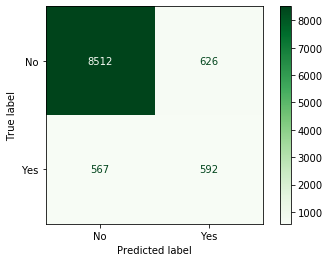

In [1448]:
plot_confusion_matrix(clf, x_test_filt, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Greens, values_format = '')

In [1449]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9138
           1       0.49      0.51      0.50      1159

    accuracy                           0.88     10297
   macro avg       0.71      0.72      0.72     10297
weighted avg       0.89      0.88      0.89     10297



Pruning the Tree

In [1450]:
path = clf.cost_complexity_pruning_path(x_train_filt, y_train)
alphas = path.ccp_alphas
print('Min:', min(alphas))
print('Max:', max(alphas))

Min: 0.0
Max: 0.0301136039629763


In [1451]:
#obtain alphas
alphas = np.arange(0, max(alphas), max(alphas)/100).tolist()

test_score = []
train_score = []

for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha = i)
    clf.fit(x_train_filt, y_train)
    test_score.append(clf.score(x_test_filt, y_test))
    train_score.append(clf.score(x_train_filt, y_train))

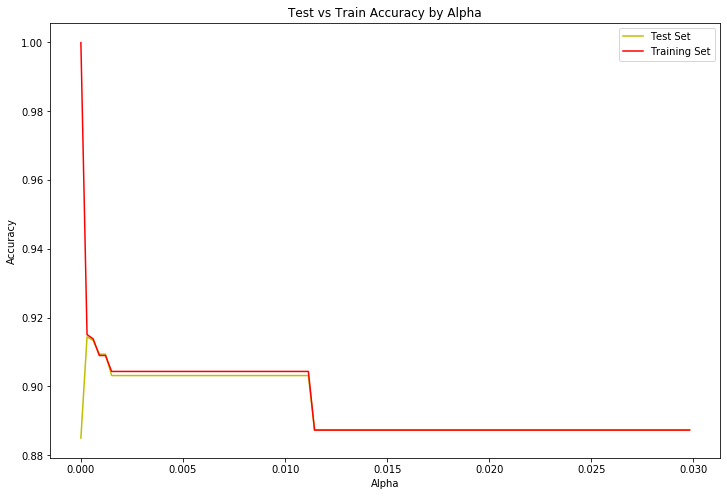

In [1452]:
plt.figure(figsize=(12,8))  
plt.plot(alphas, test_score, color='y', label='Test Set')
plt.plot(alphas, train_score, color='r', label='Training Set')


plt.legend()
plt.title('Test vs Train Accuracy by Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

plt.show()

In [1453]:
alpha_acc = []

for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)
    score = cross_val_score(clf, x_train_filt, y_train, cv=5)
    alpha_acc.append(np.mean(score))

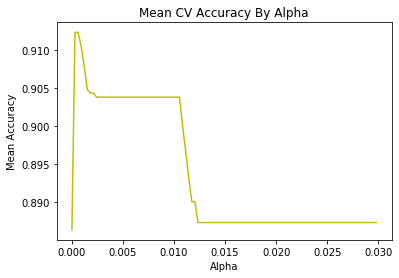

In [1454]:
plt.plot(alphas, alpha_acc, color='y')

plt.title('Mean CV Accuracy By Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')

plt.show()

In [1455]:
alpha_optim = alphas[alpha_acc.index(max(alpha_acc))]

In [1456]:
alpha_optim

0.000602272079259526

In [1457]:
clf = DecisionTreeClassifier(ccp_alpha=alpha_optim)
clf.fit(x_train_filt, y_train)
pred_test = clf.predict(x_test_filt)
pred_train = clf.predict(x_train_filt)

In [1458]:
print("Test Accuracy:",metrics.accuracy_score(y_test, pred_test))
print("Train Accuracy:",metrics.accuracy_score(y_train, pred_train))

Test Accuracy: 0.9133728270370011
Train Accuracy: 0.9138260334725324


[Text(402.80625000000003, 373.72499999999997, 'X[9] <= 5087.65\ngini = 0.2\nsamples = 30891\nvalue = [27410, 3481]'),
 Text(167.4, 305.775, 'X[5] <= 172.5\ngini = 0.494\nsamples = 3705\nvalue = [2056, 1649]'),
 Text(83.7, 237.825, 'X[5] <= 133.5\ngini = 0.277\nsamples = 1400\nvalue = [1167, 233]'),
 Text(41.85, 169.87499999999997, 'gini = 0.18\nsamples = 950\nvalue = [855, 95]'),
 Text(125.55000000000001, 169.87499999999997, 'gini = 0.425\nsamples = 450\nvalue = [312, 138]'),
 Text(251.10000000000002, 237.825, 'X[3] <= 0.5\ngini = 0.474\nsamples = 2305\nvalue = [889, 1416]'),
 Text(209.25, 169.87499999999997, 'X[5] <= 283.5\ngini = 0.498\nsamples = 1621\nvalue = [761, 860]'),
 Text(167.4, 101.92499999999995, 'gini = 0.489\nsamples = 700\nvalue = [403, 297]'),
 Text(251.10000000000002, 101.92499999999995, 'gini = 0.475\nsamples = 921\nvalue = [358, 563]'),
 Text(292.95, 169.87499999999997, 'gini = 0.304\nsamples = 684\nvalue = [128, 556]'),
 Text(638.2125, 305.775, 'X[5] <= 606.5\ngini 

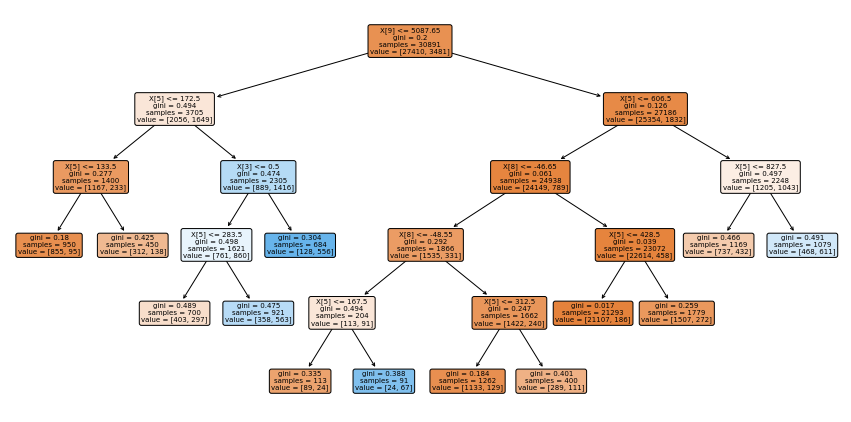

In [1459]:
plt.figure(figsize=(15, 7.5))
tree.plot_tree(clf,
              filled=True,
              rounded=True
              )

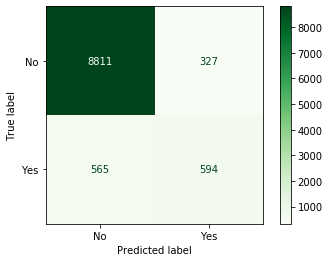

In [1460]:
plot_confusion_matrix(clf, x_test_filt, y_test, display_labels=['No', 'Yes'], cmap=plt.cm.Greens, values_format = '')

In [1461]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9138
           1       0.64      0.51      0.57      1159

    accuracy                           0.91     10297
   macro avg       0.79      0.74      0.76     10297
weighted avg       0.91      0.91      0.91     10297



In [1462]:
text_representation = tree.export_text(clf)
#print(text_representation)

In [1463]:
predtestprobs = clf.predict_proba(x_test_filt)
predtestprobs = predtestprobs[:,1]

AUC: 0.9177254959945961


Text(0, 0.5, 'FPR')

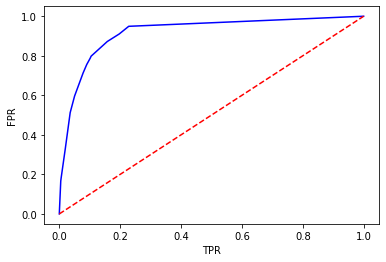

In [1464]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')